# Import Libraries

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression

import dmba
from dmba import plotDecisionTree, classificationSummary, gainsChart, liftChart

import statsmodels.api as sm
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from pycaret.classification import *
from mord import LogisticIT

import matplotlib.pylab as plt
%matplotlib inline

# Data Set

## Load Data Set

In [2]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
data = pd.read_csv("train.csv", index_col=['id'])
test = pd.read_csv("test.csv", index_col=['id'])
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
id,,,,,,,,,,,,,,,,,,
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2,1
42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0,0
42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0,0


## EDA with data set

In [4]:
data.shape

(42100, 18)

In [5]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42100 entries, 0 to 42099
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42100 non-null  int64  
 1   no_of_children                        42100 non-null  int64  
 2   no_of_weekend_nights                  42100 non-null  int64  
 3   no_of_week_nights                     42100 non-null  int64  
 4   type_of_meal_plan                     42100 non-null  int64  
 5   required_car_parking_space            42100 non-null  int64  
 6   room_type_reserved                    42100 non-null  int64  
 7   lead_time                             42100 non-null  int64  
 8   arrival_year                          42100 non-null  int64  
 9   arrival_month                         42100 non-null  int64  
 10  arrival_date                          42100 non-null  int64  
 11  market_segment_type 

In [7]:
missing_data = data.isna().mean(axis=0)
missing_data

no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

In [8]:
train_dups =  data.duplicated().sum()
test_dups = test.duplicated().sum()


print(f'''
train:    {train_dups}
test:     {test_dups}
''')


train:    0
test:     253



In [9]:
data['booking_status'].value_counts()

booking_status
0    25596
1    16504
Name: count, dtype: int64

<Axes: >

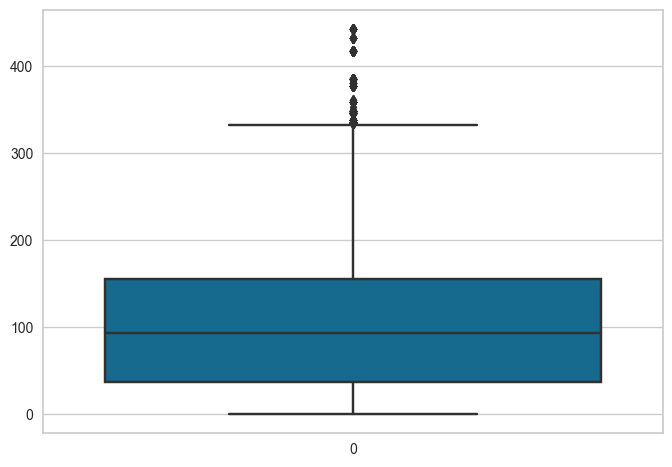

In [10]:
sns.boxplot(data.lead_time)

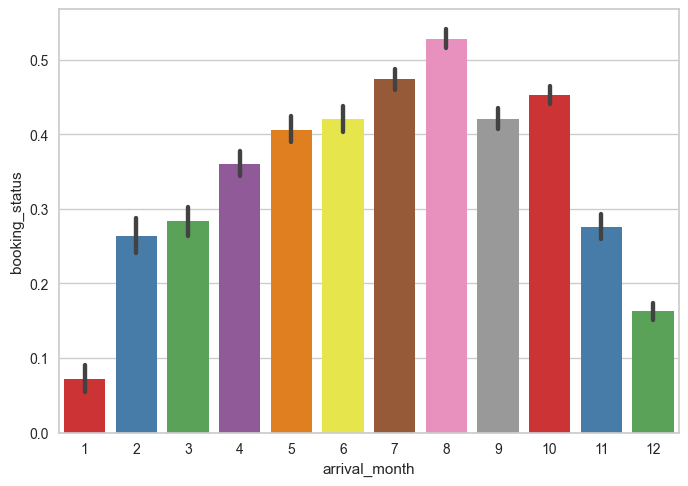

In [11]:
fig, ax1 = plt.subplots()

ax1 = sns.barplot(x = "arrival_month", y = "booking_status", 
                  data = data.sort_values('booking_status'), palette = "Set1")

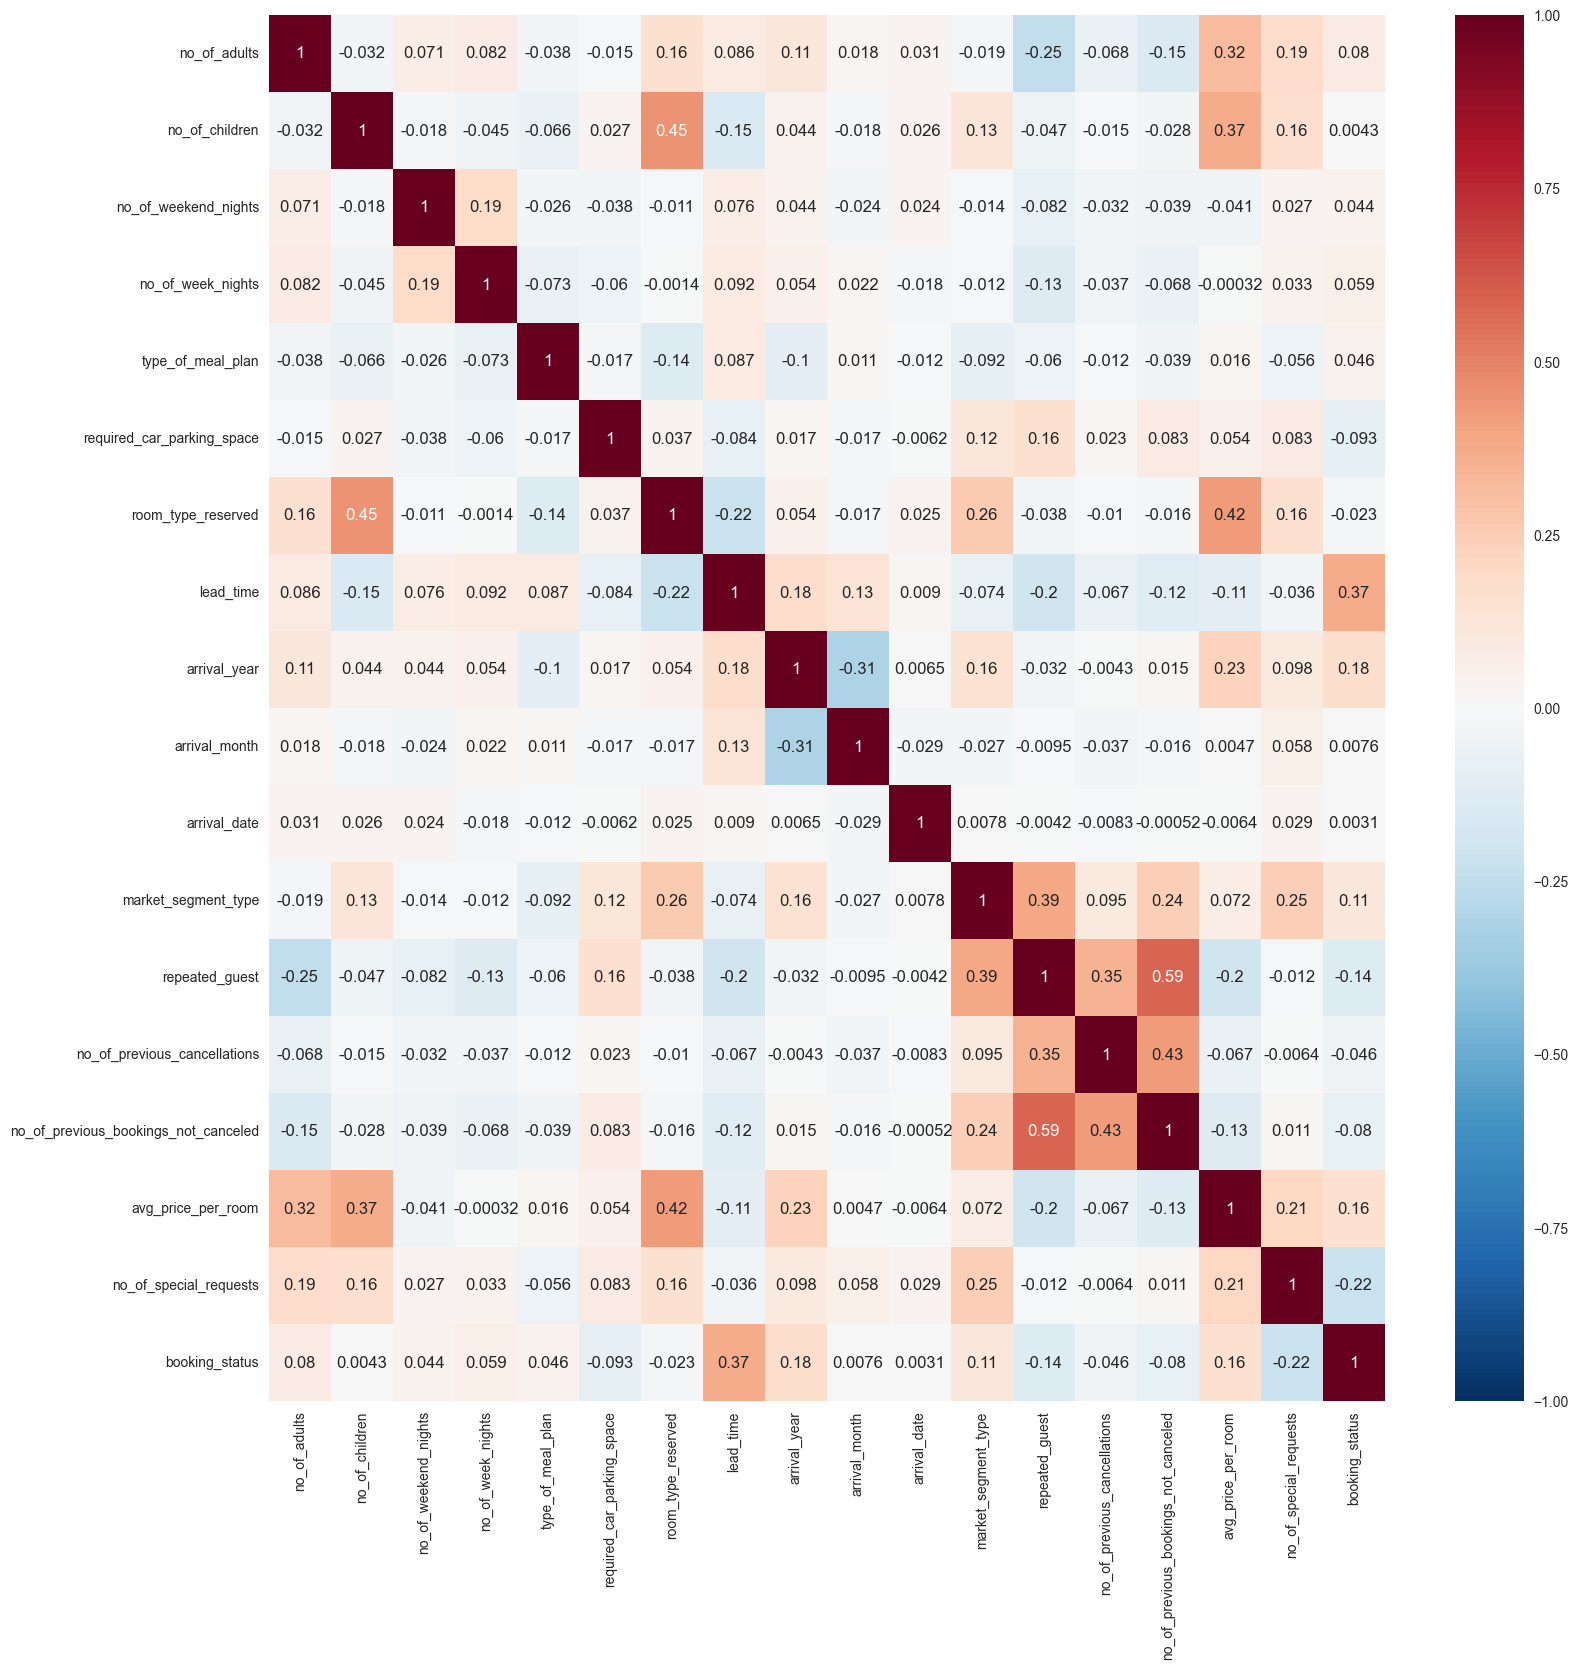

In [12]:
corr = data.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, cmap="RdBu_r", annot=True, vmax=1, vmin=-1)
plt.show()

# Classification Models

## Test Train Split

In [13]:
X = data.drop(columns=['booking_status'])
y = data['booking_status']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

## Catboost

### Train Model

In [14]:
cat_model = CatBoostClassifier(iterations=1000,
                               task_type="GPU",
                               devices='0:1',
                               learning_rate = 0.05,
                              depth=10)

In [15]:
cat_model.fit(train_X, train_y, eval_set=(valid_X, valid_y), early_stopping_rounds=10)

0:	learn: 0.6637146	test: 0.6638798	best: 0.6638798 (0)	total: 270ms	remaining: 4m 29s
1:	learn: 0.6379653	test: 0.6380109	best: 0.6380109 (1)	total: 366ms	remaining: 3m 2s
2:	learn: 0.6142765	test: 0.6141941	best: 0.6141941 (2)	total: 609ms	remaining: 3m 22s
3:	learn: 0.5936317	test: 0.5934506	best: 0.5934506 (3)	total: 850ms	remaining: 3m 31s
4:	learn: 0.5762223	test: 0.5757593	best: 0.5757593 (4)	total: 1.09s	remaining: 3m 36s
5:	learn: 0.5605818	test: 0.5600275	best: 0.5600275 (5)	total: 1.22s	remaining: 3m 22s
6:	learn: 0.5466105	test: 0.5460698	best: 0.5460698 (6)	total: 1.3s	remaining: 3m 4s
7:	learn: 0.5352526	test: 0.5346341	best: 0.5346341 (7)	total: 1.34s	remaining: 2m 46s
8:	learn: 0.5240840	test: 0.5235002	best: 0.5235002 (8)	total: 1.58s	remaining: 2m 54s
9:	learn: 0.5142618	test: 0.5135912	best: 0.5135912 (9)	total: 1.82s	remaining: 2m 59s
10:	learn: 0.5053175	test: 0.5048830	best: 0.5048830 (10)	total: 2.06s	remaining: 3m 4s
11:	learn: 0.4967896	test: 0.4965689	best: 0.

### Accuracy

In [16]:
y_pred_catboost = cat_model.predict(valid_X)
y_pred_catboost

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
# Predict probabilities
y_pred_proba = cat_model.predict_proba(valid_X)

In [18]:
# Create a DataFrame with actual values, predicted labels, and predicted probabilities
cat_df_predictions = pd.DataFrame({
    'actual': valid_y,
    'predicted': y_pred_catboost,
    'probability_0': y_pred_proba[:, 0],  # Probability of class 0
    'probability_1': y_pred_proba[:, 1]   # Probability of class 1
})

# Display the first few rows
print(cat_df_predictions.head())


       actual  predicted  probability_0  probability_1
id                                                    
37633       0          0       0.898264       0.101736
24516       0          0       0.948682       0.051318
31459       1          1       0.088566       0.911434
24091       0          0       0.605917       0.394083
13874       0          1       0.109892       0.890108


### Accuracy

In [19]:
classificationSummary(valid_y, y_pred_catboost)

Confusion Matrix (Accuracy 0.8191)

       Prediction
Actual    0    1
     0 8949 1322
     1 1724 4845


In [20]:
cat_df_predictions = cat_df_predictions.sort_values(by=['probability_1'], ascending=False)

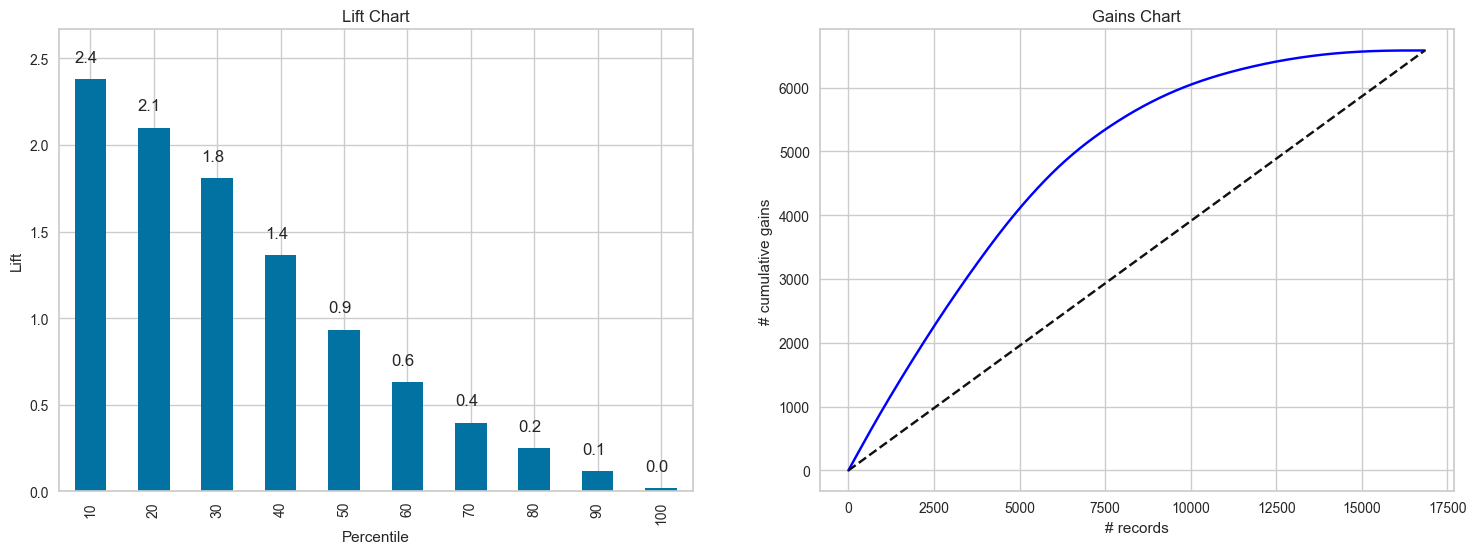

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

liftChart(cat_df_predictions.probability_1, title="Lift Chart", ax=axes[0])

gainsChart(cat_df_predictions.probability_1, color='Blue', ax=axes[1])

plt.title('Gains Chart')
plt.show()

### Predictions

In [22]:
# cat_test_pred = cat_model.predict(test)

In [23]:
# test['booking_status'] = test_pred

In [24]:
# test_prediction_df = pd.DataFrame(test, columns=['booking_status'])
# test_prediction_df

In [25]:
# test_prediction_df.to_csv('cat_test_prediction.csv')

## Lightgbm

In [26]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

### Train Model

In [27]:
# Create and train the model
lgbm_model = LGBMClassifier(objective='binary', 
                       boosting_type='gbdt', 
                       num_leaves=31, 
                       learning_rate=0.05, )

In [28]:
lgbm_model.fit(train_X, train_y, eval_set=[(valid_X, valid_y)], eval_metric='logloss')

[LightGBM] [Info] Number of positive: 9935, number of negative: 15325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 25260, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393310 -> initscore=-0.433422
[LightGBM] [Info] Start training from score -0.433422


LGBMClassifier(learning_rate=0.05, objective='binary')

In [29]:
lgbm_pred = lgbm_model.predict(valid_X)
lgbm_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
# Predict probabilities
lgbm_pred_proba = lgbm_model.predict_proba(valid_X)

In [31]:
# Create a DataFrame with actual values, predicted labels, and predicted probabilities
lgbm_df_predictions = pd.DataFrame({
    'actual': valid_y,
    'predicted': lgbm_pred,
    'probability_0': lgbm_pred_proba[:, 0],  # Probability of class 0
    'probability_1': lgbm_pred_proba[:, 1]   # Probability of class 1
})

# Display the first few rows
print(lgbm_df_predictions.head())


       actual  predicted  probability_0  probability_1
id                                                    
37633       0          0       0.798526       0.201474
24516       0          0       0.952247       0.047753
31459       1          1       0.093633       0.906367
24091       0          0       0.647706       0.352294
13874       0          1       0.138997       0.861003


### Accuracy

In [32]:
classificationSummary(valid_y, lgbm_pred)

Confusion Matrix (Accuracy 0.8195)

       Prediction
Actual    0    1
     0 8991 1280
     1 1759 4810


In [33]:
lgbm_df_predictions = lgbm_df_predictions.sort_values(by=['probability_1'], ascending=False)

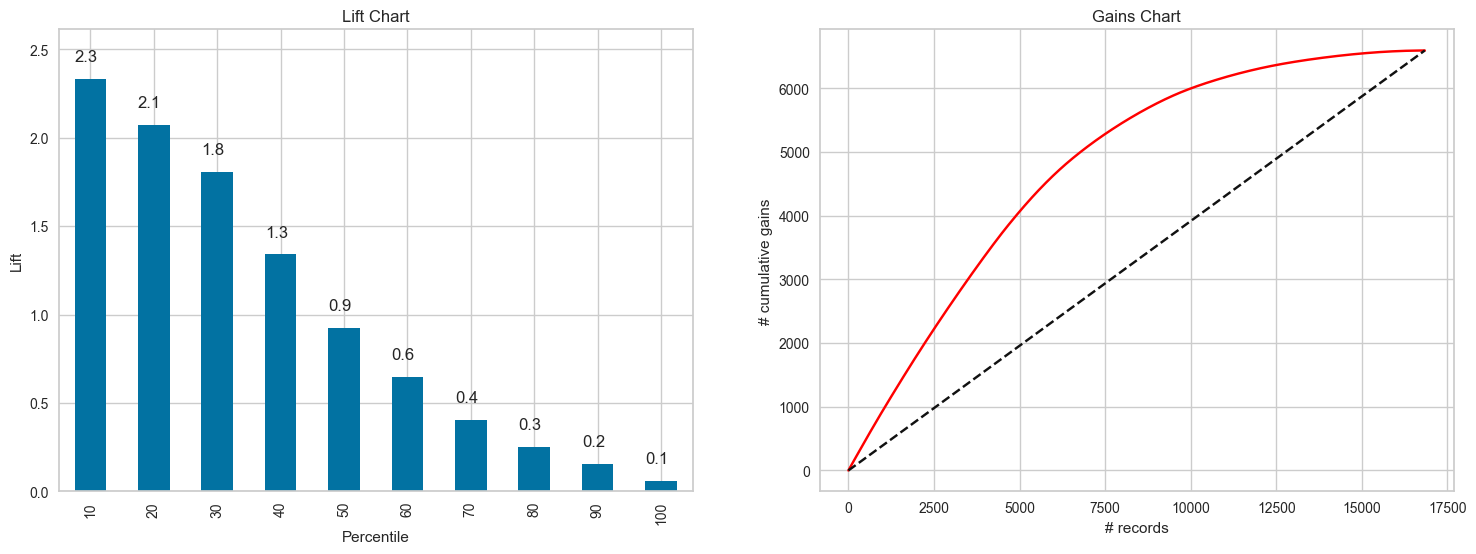

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

liftChart(lgbm_df_predictions.probability_1, title="Lift Chart", ax=axes[0])

gainsChart(lgbm_df_predictions.probability_1, color='Red', ax=axes[1])

plt.title('Gains Chart')
plt.show()

## XGBoost

### Train Model

In [35]:
# Create and train the model
xgb_model = xgb.XGBClassifier( 
                       boosting_type='gbdt', 
                       num_leaves=31, 
                       learning_rate=0.05)

In [36]:
xgb_model.fit(train_X, train_y, eval_set=[(valid_X, valid_y)], eval_metric='logloss')

[0]	validation_0-logloss:0.64922
[1]	validation_0-logloss:0.63150
[2]	validation_0-logloss:0.61554
[3]	validation_0-logloss:0.60098
[4]	validation_0-logloss:0.58764
[5]	validation_0-logloss:0.57549
[6]	validation_0-logloss:0.56434
[7]	validation_0-logloss:0.55419
[8]	validation_0-logloss:0.54478
[9]	validation_0-logloss:0.53617
[10]	validation_0-logloss:0.52828
[11]	validation_0-logloss:0.52088
[12]	validation_0-logloss:0.51410
[13]	validation_0-logloss:0.50781
[14]	validation_0-logloss:0.50193
[15]	validation_0-logloss:0.49663
[16]	validation_0-logloss:0.49163
[17]	validation_0-logloss:0.48690
[18]	validation_0-logloss:0.48233
[19]	validation_0-logloss:0.47819
[20]	validation_0-logloss:0.47427
[21]	validation_0-logloss:0.47070
[22]	validation_0-logloss:0.46730
[23]	validation_0-logloss:0.46421
[24]	validation_0-logloss:0.46124
[25]	validation_0-logloss:0.45853
[26]	validation_0-logloss:0.45607
[27]	validation_0-logloss:0.45360
[28]	validation_0-logloss:0.45139
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, boosting_type='gbdt',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_leaves=31, ...)

In [37]:
xgb_pred = xgb_model.predict(valid_X)
xgb_pred

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
# Predict probabilities
xgb_pred_proba = xgb_model.predict_proba(valid_X)

In [39]:
# Create a DataFrame with actual values, predicted labels, and predicted probabilities
xgb_df_predictions = pd.DataFrame({
    'actual': valid_y,
    'predicted': xgb_pred,
    'probability_0': xgb_pred_proba[:, 0],  # Probability of class 0
    'probability_1': xgb_pred_proba[:, 1]   # Probability of class 1
})

# Display the first few rows
print(xgb_df_predictions.head())

       actual  predicted  probability_0  probability_1
id                                                    
37633       0          0       0.748060       0.251940
24516       0          0       0.948179       0.051821
31459       1          1       0.100503       0.899497
24091       0          0       0.649988       0.350012
13874       0          1       0.149412       0.850588


### Accuracy

In [40]:
classificationSummary(valid_y, xgb_pred)

Confusion Matrix (Accuracy 0.8174)

       Prediction
Actual    0    1
     0 8973 1298
     1 1777 4792


In [41]:
xgb_df_predictions = xgb_df_predictions.sort_values(by=['probability_1'], ascending=False)

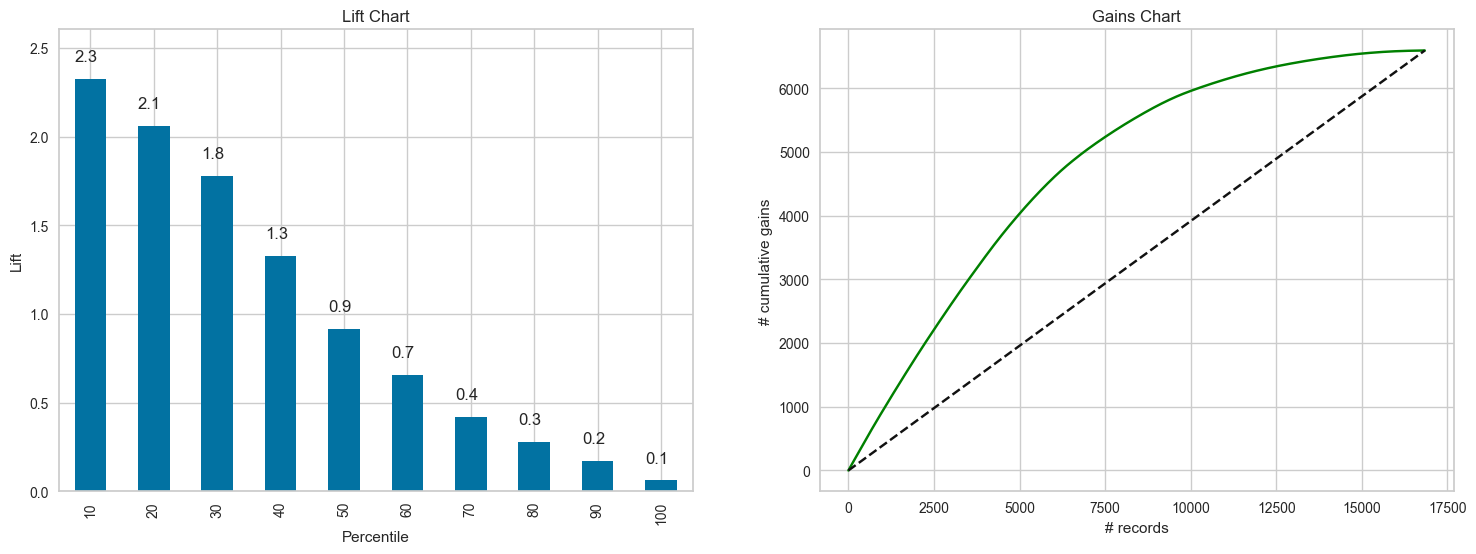

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

liftChart(xgb_df_predictions.probability_1, title="Lift Chart", ax=axes[0])

gainsChart(xgb_df_predictions.probability_1, color='Green', ax=axes[1])

plt.title('Gains Chart')
plt.show()

### Predictions

In [43]:
# xgb_test_preds = xgb_model.predict(test)
# xgb_test_preds

In [44]:
# test_prediction_df = pd.DataFrame(test_preds, columns=['booking_status'])
# test_prediction_df

In [45]:
# test_prediction_df.to_csv('test_prediction.csv')

## XGBoost Part 2 - Tweaking Parameters

In [46]:
params = {
            "objective": "binary:logitraw",
            "eval_metric": "auc",
            'booster': 'gbtree',
            'n_estimators': 5000,
            'max_depth' : 5, 
            'eta':  0.02465211760946184, 
            'random_state': 33333,
            "scale_pos_weight": 1, 
            'subsample': 0.8807634510839019,
            'sampling_method': 'uniform', 
            'colsample_bytree':0.7615746338125093, 
            'colsample_bylevel': 0.9190448386294816,
            'colsample_bynode': 0.9190448386294816,

}

In [47]:
xgb_cl = xgb.XGBClassifier(**params)

In [48]:
xgb_cl.fit(train_X, train_y)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.9190448386294816,
              colsample_bynode=0.9190448386294816,
              colsample_bytree=0.7615746338125093, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.02465211760946184, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5000, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
preds = xgb_cl.predict(valid_X)

### Accuracy

In [50]:
accuracy_score(valid_y, preds)

0.8159738717339667

### Predictions

# Model Comparison